Polynomial Regression

Linear regression requires the relation between the dependent variable the independent variable to be linear. Often the relatinship between the dependent varibale Y and one or more of the independent X varible is not a strait line relationship but, rather, has some curvature to it.

# Polynomial Regression

Polynomial Regression is a special case of Multiple Linear Regression Where fit a plynomial equation on the data with curvilinear relationship between the target variable and the independent variables.

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data Set
df =  pd.read_csv("C:\\Users\\pc\\Desktop\\Data Science\\MachineLearning\\Starts\\WeatherData.csv")

In [2]:
df.head(6)

,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83
5,1014.52,0.85


In [3]:
# Check Data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pressure (millibars)  25 non-null     float64
 1   Humidity              25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


Text(0, 0.5, 'Humidity')

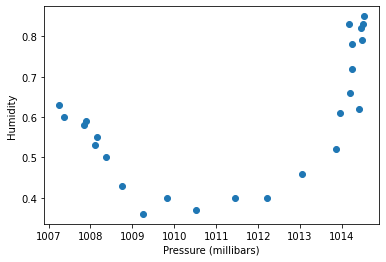

In [4]:
#Set our input x to Pressure, use [[]] to convert to 2D array suitable for model input.

X = df[['Pressure (millibars)']]
y = df['Humidity']

# Produce a Scatter graph of Humidity against Pressure
plt .scatter(X, y)
plt.xlabel("Pressure (millibars)")
plt.ylabel("Humidity")

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
y_pred= lr.predict(X)

Text(0, 0.5, 'Humidity')

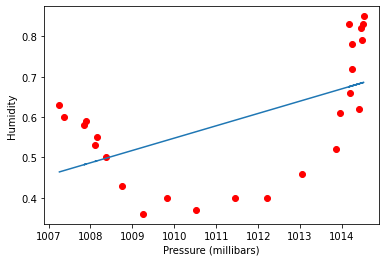

In [10]:
#Visualising simple Linear Regression results
plt.scatter(X,y, color='red')
plt.plot(X, y_pred)
plt.xlabel("Pressure (millibars)")
plt.ylabel("Humidity")

#  Fitting Polynomial Regression



In [15]:
# Imports

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

pre_process = PolynomialFeatures(degree=2)

# Transform X input to 1, x and x^2
X_poly = pre_process.fit_transform(X)

# Show the transformat on the notebook
print(X_poly)

[[1.00000000e+00 1.01440000e+03 1.02900736e+06]
 [1.00000000e+00 1.01420000e+03 1.02860164e+06]
 [1.00000000e+00 1.01447000e+03 1.02914938e+06]
 [1.00000000e+00 1.01445000e+03 1.02910880e+06]
 [1.00000000e+00 1.01449000e+03 1.02918996e+06]
 [1.00000000e+00 1.01452000e+03 1.02925083e+06]
 [1.00000000e+00 1.01416000e+03 1.02852051e+06]
 [1.00000000e+00 1.01424000e+03 1.02868278e+06]
 [1.00000000e+00 1.01425000e+03 1.02870306e+06]
 [1.00000000e+00 1.01396000e+03 1.02811488e+06]
 [1.00000000e+00 1.01385000e+03 1.02789182e+06]
 [1.00000000e+00 1.01304000e+03 1.02625004e+06]
 [1.00000000e+00 1.01222000e+03 1.02458933e+06]
 [1.00000000e+00 1.01144000e+03 1.02301087e+06]
 [1.00000000e+00 1.01052000e+03 1.02115067e+06]
 [1.00000000e+00 1.00983000e+03 1.01975663e+06]
 [1.00000000e+00 1.00926000e+03 1.01860575e+06]
 [1.00000000e+00 1.00876000e+03 1.01759674e+06]
 [1.00000000e+00 1.00836000e+03 1.01678989e+06]
 [1.00000000e+00 1.00811000e+03 1.01628577e+06]
 [1.00000000e+00 1.00815000e+03 1.016366

In [16]:
pr_model = LinearRegression()
#Fit our Preprocessed data to the polynomial Regression model
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)

Text(0, 0.5, 'Humidity')

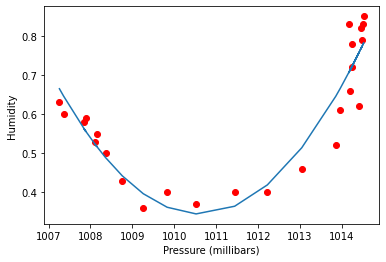

In [17]:
# Visualaizing our Polynomial Regrresion Model 
plt.scatter(X,y, c ='red')
plt.plot(X,y_pred)
plt.xlabel("Pressure (millibars)")
plt.ylabel("Humidity")

## R-Square Value

In [18]:
print("R-Square value of Prediction",metrics.r2_score(y,y_pred))

R-Square value of Prediction 0.8616233381720982


In [19]:
# Cross check first few actual values and Predicted Values

df_check = pd.DataFrame({'Actual': y.values, 'Predicted': y_pred.ravel()})
df_check

,Actual,Predicted
0,0.62,0.755816
1,0.66,0.713629
2,0.79,0.771122
3,0.82,0.766720
4,0.83,0.775546
5,0.85,0.782226
6,0.83,0.705465
7,0.78,0.721884
8,0.72,0.723962
9,0.61,0.666019


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

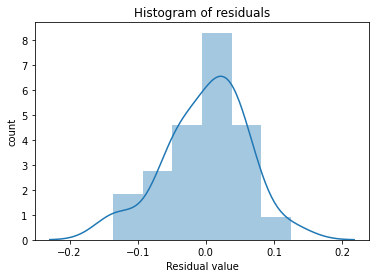

In [20]:
 ## first compute vector of residuals. 

resids = np.subtract(y, y_pred)

## now make the residual plots
sns.distplot(resids)
plt.title('Histogram of residuals')
plt.xlabel('Residual value')
plt.ylabel('count')